# Hand in 9 MLOps

## Execise 1

In this exercise, do the following:
1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.
2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.
3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.
4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?
5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?
6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import  mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [4]:
data = pd.read_csv("Data/NewAmesData1.csv")
data2 = pd.read_csv("Data/NewAmesData2.csv")
data4 = pd.read_csv("Data/NewAmesData4.csv")
data4

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,Bldg Type,Neighborhood,SalePrice
0,25646.750457,3,2001,2104,9,4,2021,1Fam,CollgCr,241432
1,26442.750457,3,1994,1486,7,8,1998,1Fam,Gilbert,168985
2,25398.750457,5,1966,921,5,6,2009,1Fam,NAmes,117751
3,26637.750457,5,1974,1713,7,7,2008,1Fam,Sawyer,179829
4,28830.750457,3,2009,1818,8,8,2010,1Fam,NridgHt,281592
...,...,...,...,...,...,...,...,...,...,...
1469,25995.750457,3,1990,1769,7,4,2008,1Fam,Gilbert,202504
1470,26454.750457,4,1964,1071,6,6,2009,1Fam,NWAmes,153826
1471,26212.750457,4,1993,2102,7,11,2004,1Fam,CollgCr,239174
1472,30488.750457,4,1963,1373,5,11,1998,1Fam,Sawyer,186076


## 1. Make a function for data preprocessing

In [5]:
def preprocess_ames(ames):
    ames_wd = ames.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int", prefix="BType"))
    ames_wd = ames_wd.join(pd.get_dummies(ames_wd["Neighborhood"], drop_first=True, dtype = "int", prefix="Nbh"))
    ames_wd = ames_wd.drop(columns = ["Bldg Type", "Neighborhood"])
    return ames_wd
    

## 2. Make a function for evaluating models

In [195]:
# 2.
def preprocess_eval_ames(ames,model):
    # preprocess the data
    ames_preprocessed = preprocess_ames(ames)

    # train test split on the data
    X_ames = ames_preprocessed.drop(columns=["SalePrice"])
    y_ames = ames_preprocessed.SalePrice
    X_train, X_test, y_train, y_test = train_test_split(X_ames, y_ames, test_size=0.2, random_state=1742)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4217)

    # fit model on the data
    model_lmbase = model
    model_lmbase.fit(X_train, y_train)
    # get prediction from the model
    y_pred_lmbase = model_lmbase.predict(X_val)

    return mean_absolute_error(y_val, y_pred_lmbase)
    

## 3. Testing the function

In [198]:

preprocess_eval_ames(data,RandomForestRegressor(n_estimators=500))

23040.544750000005

## 4. Evaluating the second dataset 

In [201]:
# 4. yes we see a drift from the evaluation above
preprocess_eval_ames(data2,RandomForestRegressor(n_estimators=500))

47164.410152533295

There is clearly a drift in the data indicated by the increase in errors that the model makes on the second dataset.

In [204]:
preprocess_eval_ames(data4,RandomForestRegressor(n_estimators=500))

26631.32375423729

## 5. Evaluating data drift in data 2
<b> To see where in the dataset the drift occurs ill make several plots for each of the datasets in order to compare them to the original.

In [162]:
def box_features_ames(data,data2):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    sns.boxplot(x="Yr Sold", y = "SalePrice", hue = "Yr Sold", data = data,
                showmeans=True,
                meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"},ax=ax[0])
    plt.title("Boxplot of Sales price variation over the years")
    
    
    sns.boxplot(x="Yr Sold", y = "SalePrice", hue = "Yr Sold", data = data2,
                showmeans=True,
                meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"},ax=ax[1])
    plt.title("Boxplot of Sales price variation over the years")
    fig.tight_layout(pad=5.0)
    
    plt.show()

## Boxplot comparison of dataset 1 & 2

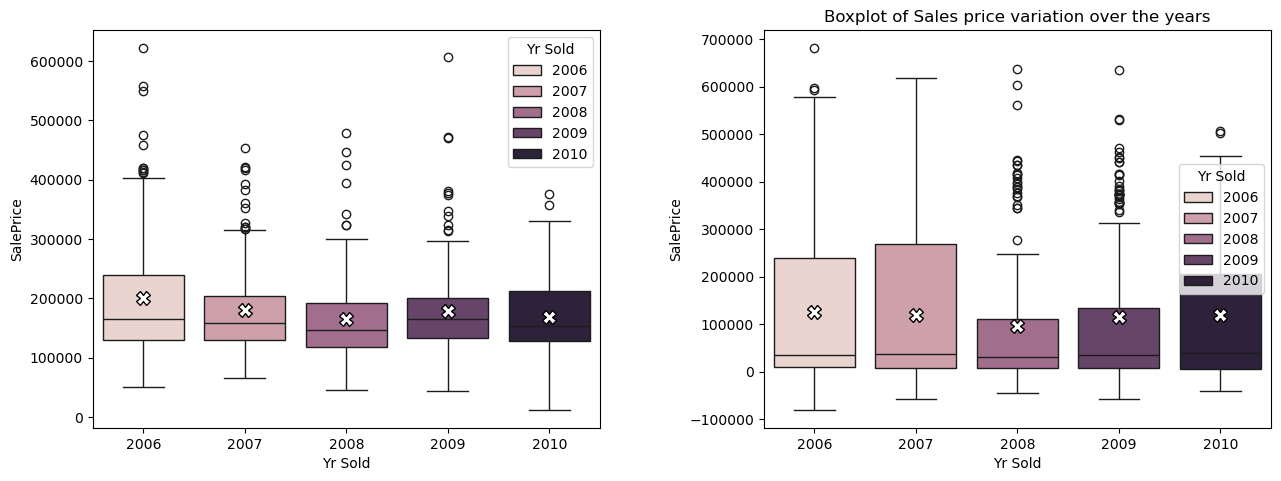

In [164]:
box_features_ames(data,data2)

Here we can see that the overall price has gone way down from the original dataset.

In [292]:
def hist_features_ames(data,data2):
    fig, ax = plt.subplots(9, 2, figsize=(10, 20))

    ax[0, 0].hist(data["Lot Area"])
    ax[0, 0].set_title("data: Lot Area")
    
    ax[0, 1].hist(data2["Lot Area"])
    ax[0, 1].set_title("data2: Lot Area")
    
    ax[1, 0].hist(data["Overall Cond"])
    ax[1, 0].set_title("data: Overall Cond")
    
    ax[1, 1].hist(data2["Overall Cond"])
    ax[1, 1].set_title("data2: Overall Cond")
    
    ax[2, 0].hist(data["Year Built"])
    ax[2, 0].set_title("data: Year Built")
    
    ax[2, 1].hist(data2["Year Built"])
    ax[2, 1].set_title("data2: Year Built")
    
    ax[3, 0].hist(data["Gr Liv Area"])
    ax[3, 0].set_title("data: Gr Liv Area")
    
    ax[3, 1].hist(data2["Gr Liv Area"])
    ax[3, 1].set_title("data2: Gr Liv Area")
    
    ax[4, 0].hist(data["Bldg Type"])
    ax[4, 0].set_title("data: Bldg Type")
    
    ax[4, 1].hist(data2["Bldg Type"])
    ax[4, 1].set_title("data2: Bldg Type")
    
    ax[5, 0].hist(data["Neighborhood"])
    ax[5, 0].set_title("data: Neighborhood")
    
    ax[5, 1].hist(data2["Neighborhood"])
    ax[5, 1].set_title("data2: Neighborhood")
    
    ax[6, 0].hist(data["TotRms AbvGrd"])
    ax[6, 0].set_title("data: TotRms AbvGrd")
    
    ax[6, 1].hist(data2["TotRms AbvGrd"])
    ax[6, 1].set_title("data2: TotRms AbvGrd")

    ax[7, 0].hist(data["Yr Sold"])
    ax[7, 0].set_title("data: Yr Sold")

    ax[7, 1].hist(data2["Yr Sold"])
    ax[7, 1].set_title("data2: Yr Sold")
    
    ax[8, 0].hist(data["SalePrice"])
    ax[8, 0].set_title("data: SalePrice")
    
    ax[8, 1].hist(data2["SalePrice"])
    ax[8, 1].set_title("data2: SalePrice")
    
    plt.tight_layout()
    plt.show()
        

## Histograms of dataset 1 & 2

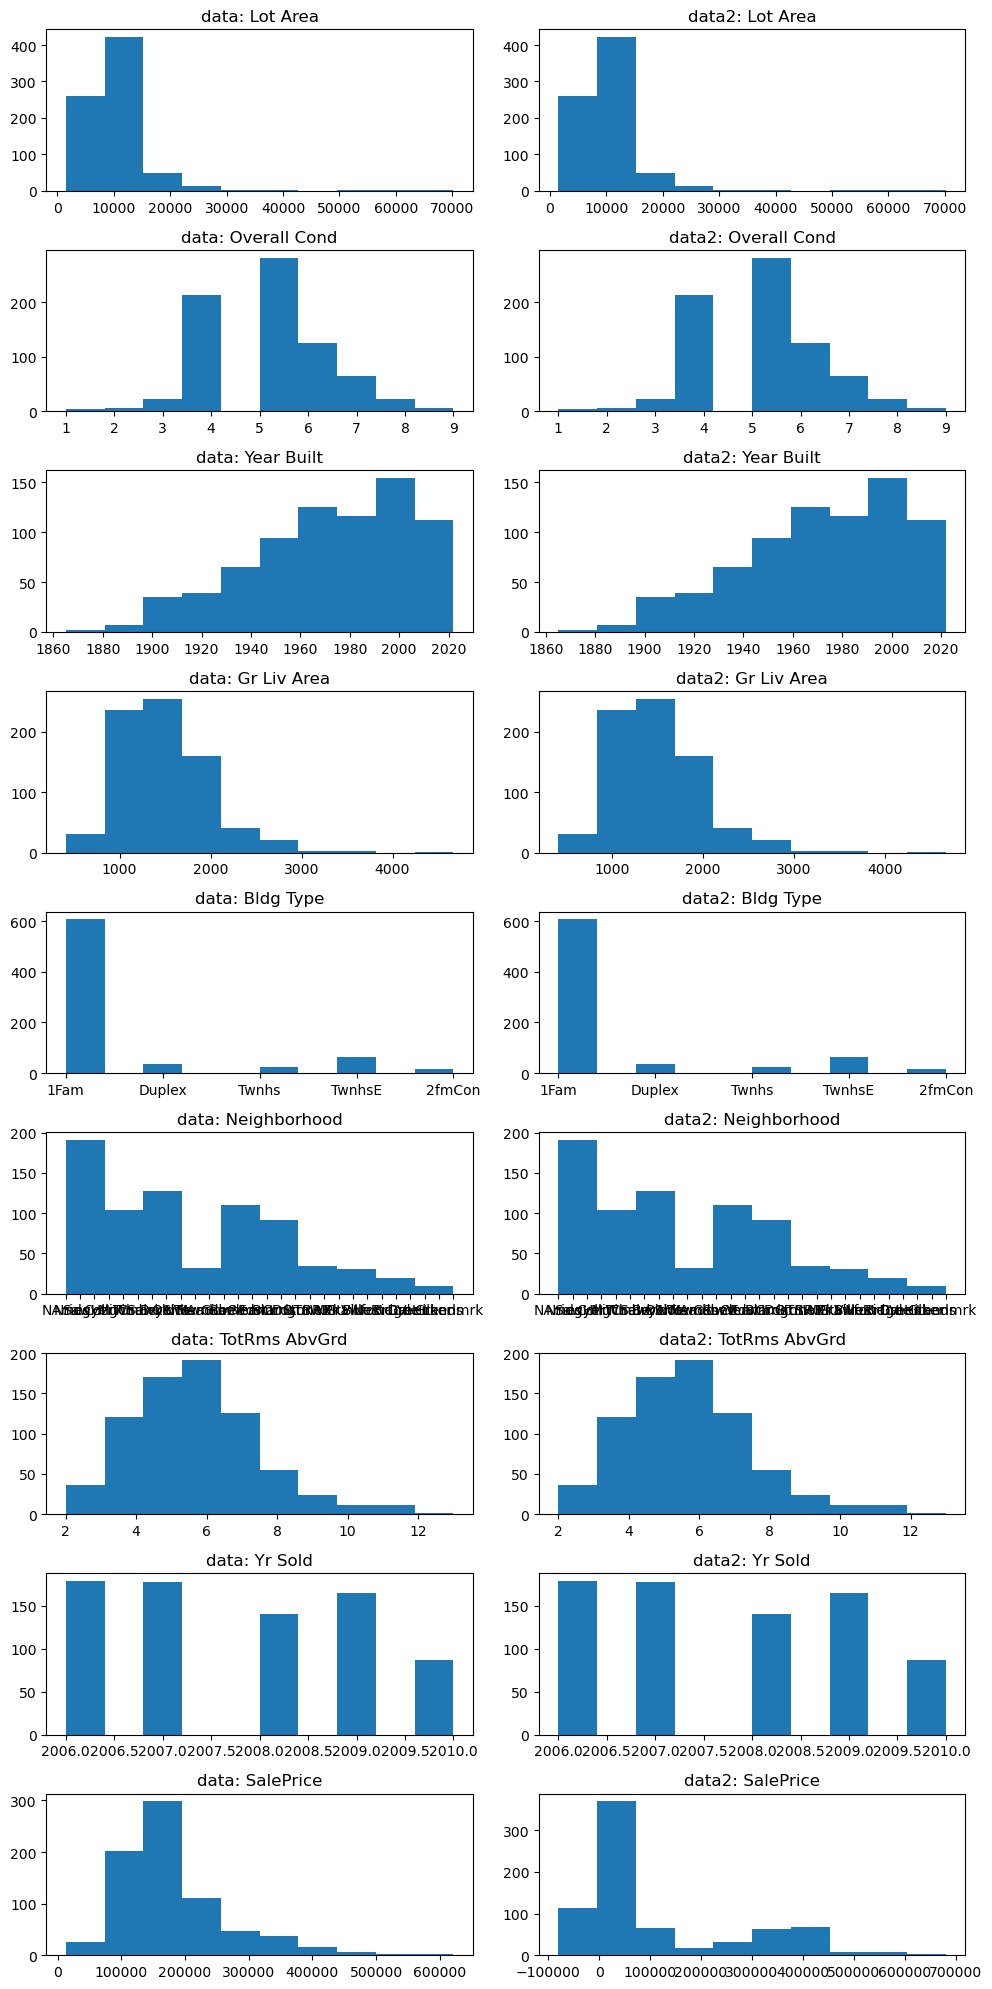

In [295]:
hist_features_ames(data,data2)

From this we can conclude that the only place where the data has changed is the sales price, which for some reason has negative values.

In [178]:
def scatter_features_ames(data,data2):
    fig, ax = plt.subplots(2,2, figsize=(12,10))
    sns.scatterplot(hue="Yr Sold", x="Gr Liv Area", y="SalePrice", data=data,ax=ax[0,0])
    sns.scatterplot(hue="Yr Sold", x="Gr Liv Area", y="SalePrice", data=data2,ax=ax[0,1])
    sns.regplot( x="Gr Liv Area", y="SalePrice", data=data,ax=ax[1,0])
    sns.regplot( x="Gr Liv Area", y="SalePrice", data=data2,ax=ax[1,1])
    sns.pairplot(hue="Yr Sold", x_vars="Gr Liv Area", y_vars="SalePrice", data=data, kind="reg", height=8)
    sns.pairplot(hue="Yr Sold", x_vars="Gr Liv Area", y_vars="SalePrice", data=data2, kind="reg", height=8)
    plt.tight_layout()
    plt.show()

## Scatterplot comparison of dataset 1 & 2 (with pair plots)

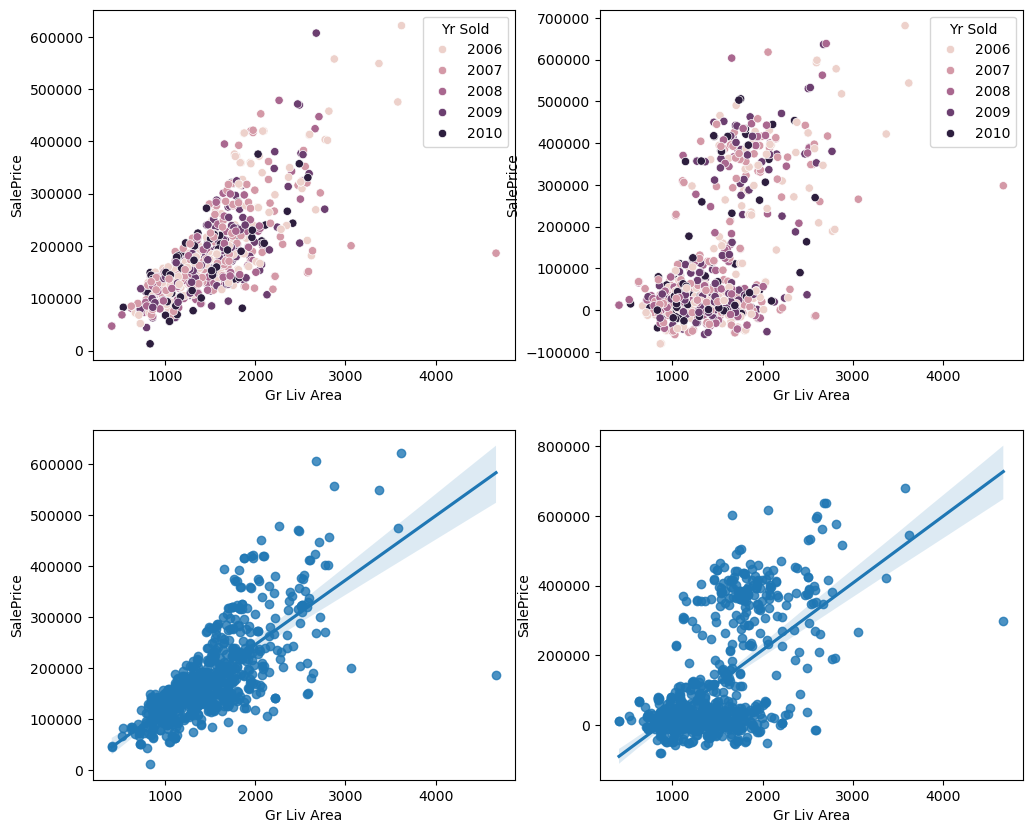

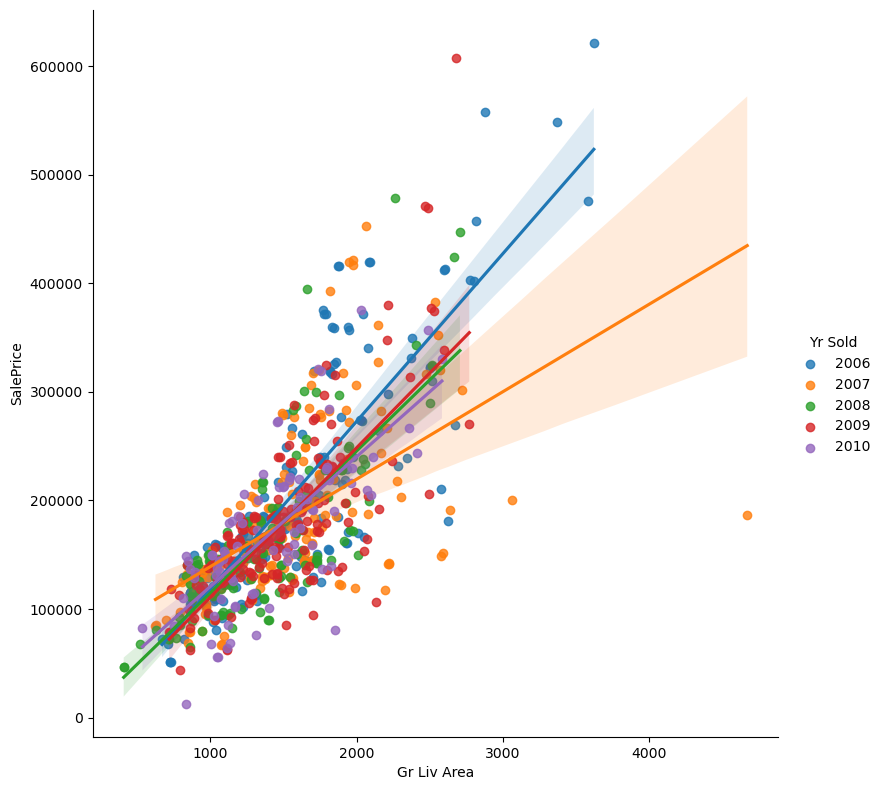

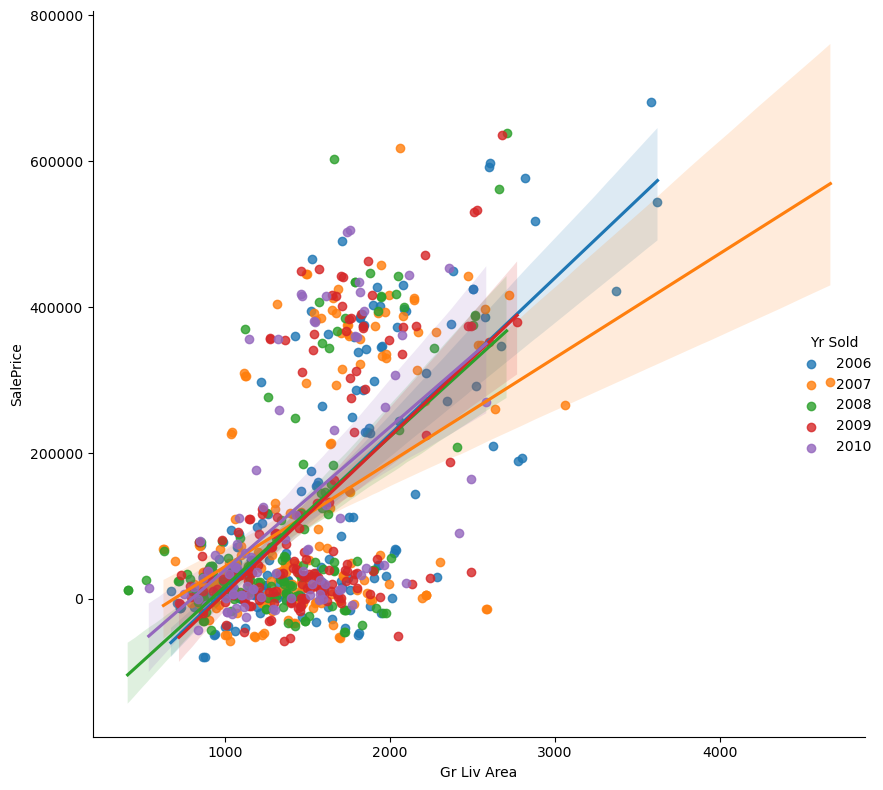

In [180]:
scatter_features_ames(data,data2)

## Conclusion for the comparison of dataset 1 & 2
The scatterplots reveal the same as the above, which is the sales price drifting downwards. This is what is also known as **label drift**, since the only thing that has changed in or data is the outcome variable that the model i trying to predict.

## 6. Evaluating drift in dataset 4
<b> Now we will apply the same procedure to the "NewAmesData4.csv" dataset and compare it to the original

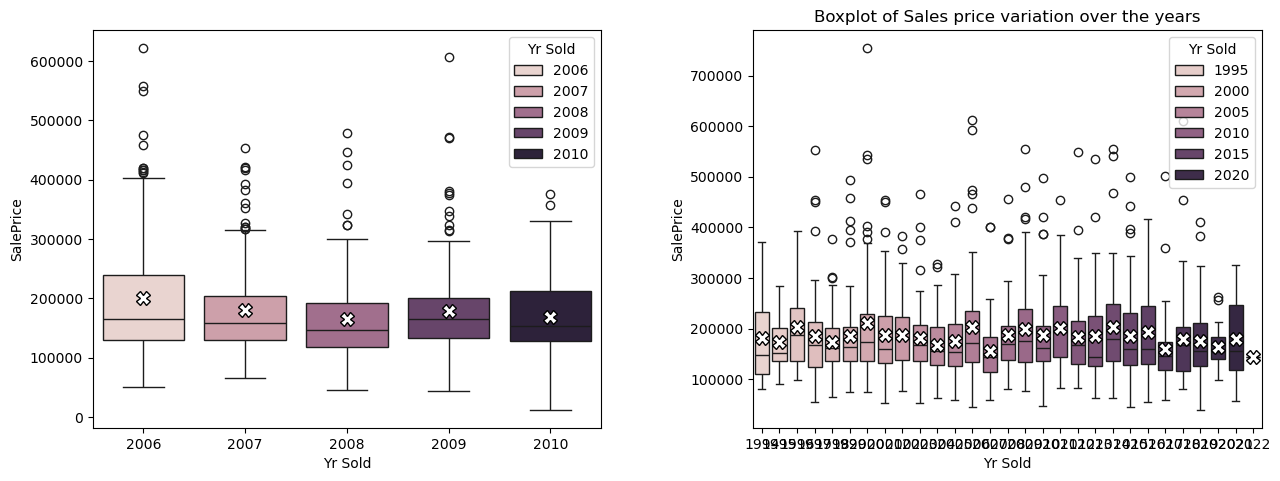

In [216]:
box_features_ames(data,data4)

In this dataset the prices are a bit more alligned with the original, but there is a far greater categories for the year of sale.

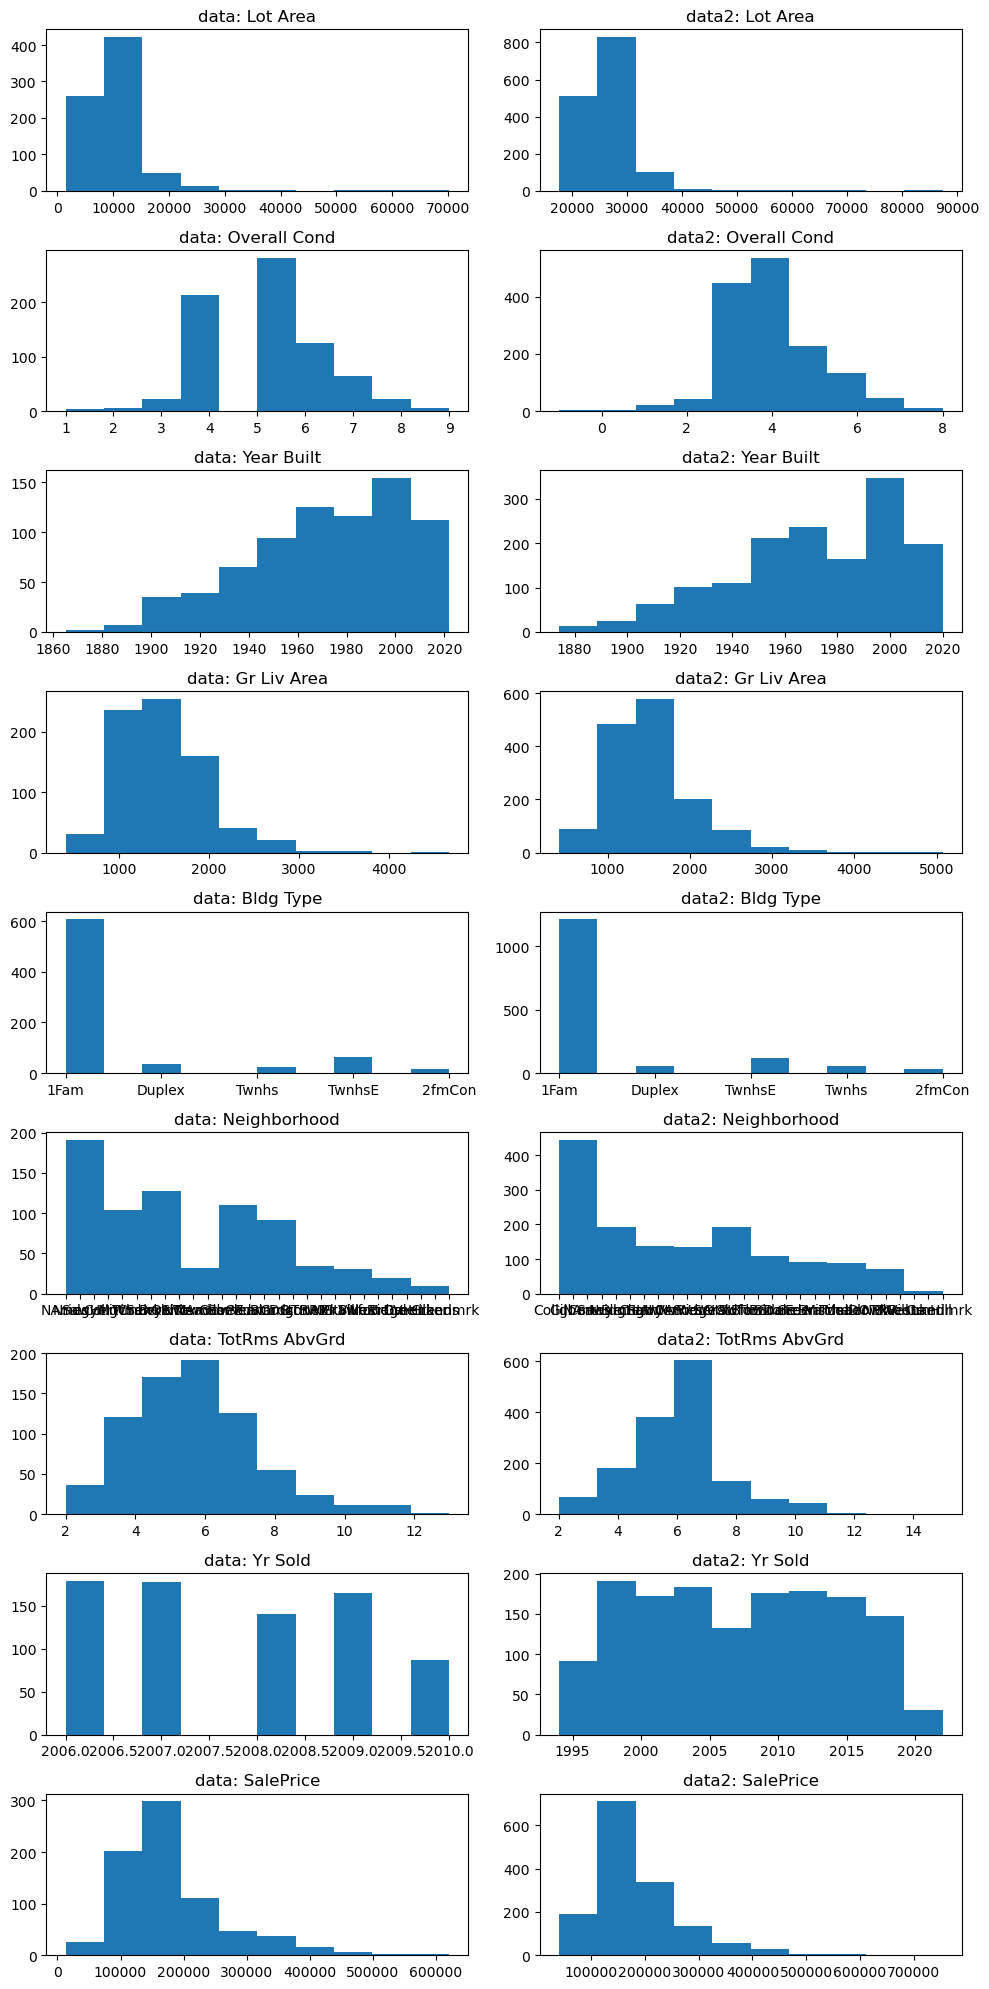

In [297]:
hist_features_ames(data,data4)

Looking at these histograms we see that a lot of the features has changed slightly with notable mentions being: **Yr Sold**, **Lot Area** and **Neighborhood**. This could be an indication of **feature drift**, since the input data has changed without a significant change to the label data (SalePrice)

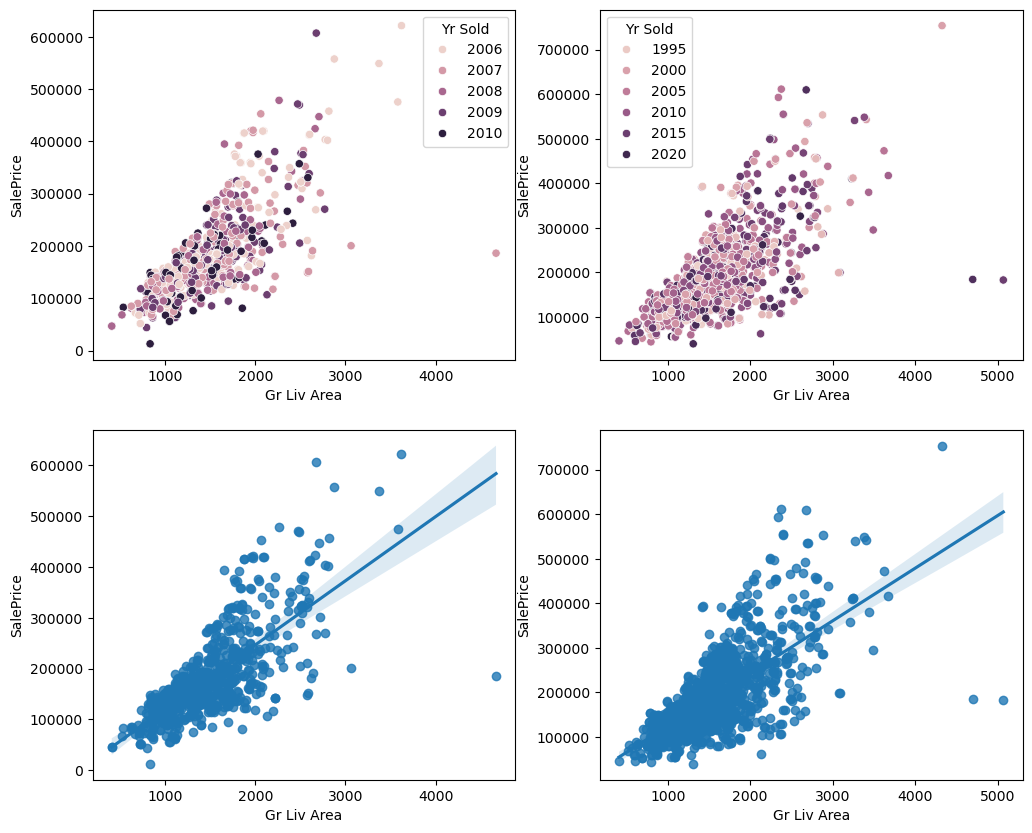

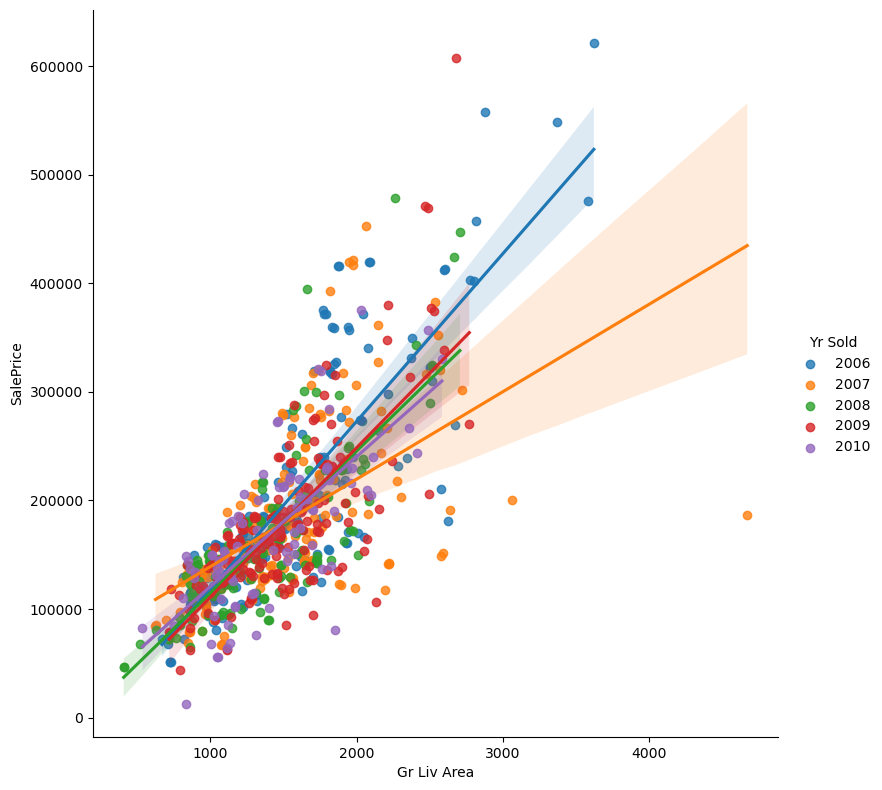

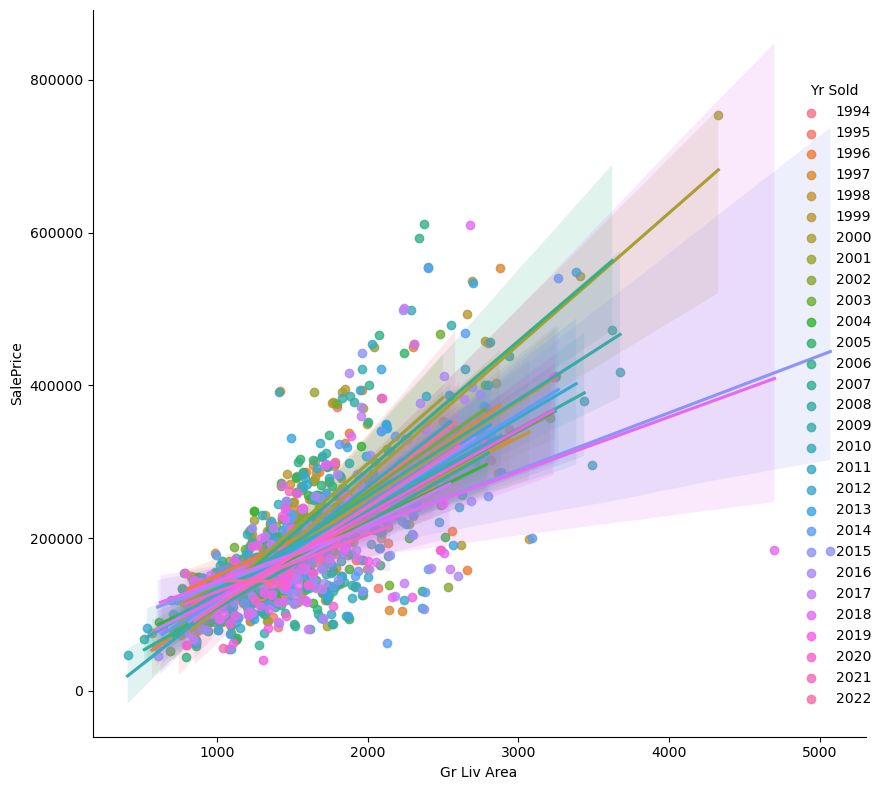

In [214]:
scatter_features_ames(data,data4)

## conclusion of the comparison between dataset 1 & 4
From what we have seen on the visualizations, the addition of more sales dates and changes to other features has led to **feature drift** resulting in our model doing slighty worse when trying to make predictions on dataset 4.